# Question 1: CNN using Tensorflow

1. Load the cifar 100 dataset. Use the 'coarse' labels.
https://www.tensorflow.org/api_docs/python/tf/keras/datasets/cifar100/load_data



In [1]:
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow import keras

(x_train, y_train), (x_test, y_test) = keras.datasets.cifar100.load_data(label_mode='coarse')
x_train=x_train/255.0
x_test=x_test/255.0

169001437/169001437 [==============================] - 18s 0us/step


2. Check if there are 20 labels in y_train using np.unique().

In [3]:
unique_labels = np.unique(y_train)
print(len(unique_labels))

20


3. More information about the dataset could be found here : https://www.cs.toronto.edu/~kriz/cifar.html . Plot the first 25 images from both the train and test data.

class_names = ["aquatic mammals","fish","flowers","food containers","fruit and vegetables","household electrical devices",
"household furniture","insects","large carnivores","large man-made outdoor things","large natural outdoor scenes","large omnivores and herbivores","medium-sized mammals","non-insect invertebrates","people","reptiles","small mammals","trees","vehicles 1","vehicles 2"]

In [4]:
class_names = ["aquatic mammals","fish","flowers","food containers","fruit and vegetables","household electrical devices", "household furniture","insects","large carnivores","large man-made outdoor things","large natural outdoor scenes","large omnivores and herbivores","medium-sized mammals","non-insect invertebrates","people","reptiles","small mammals","trees","vehicles 1","vehicles 2"]
def plot_images(images, labels, title):
    plt.figure(figsize=(20, 20))
    for i in range(25):
        plt.subplot(5, 5, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i])
        plt.xlabel(class_names[labels[i].ravel()[0]])
    plt.suptitle(title)
    plt.show()

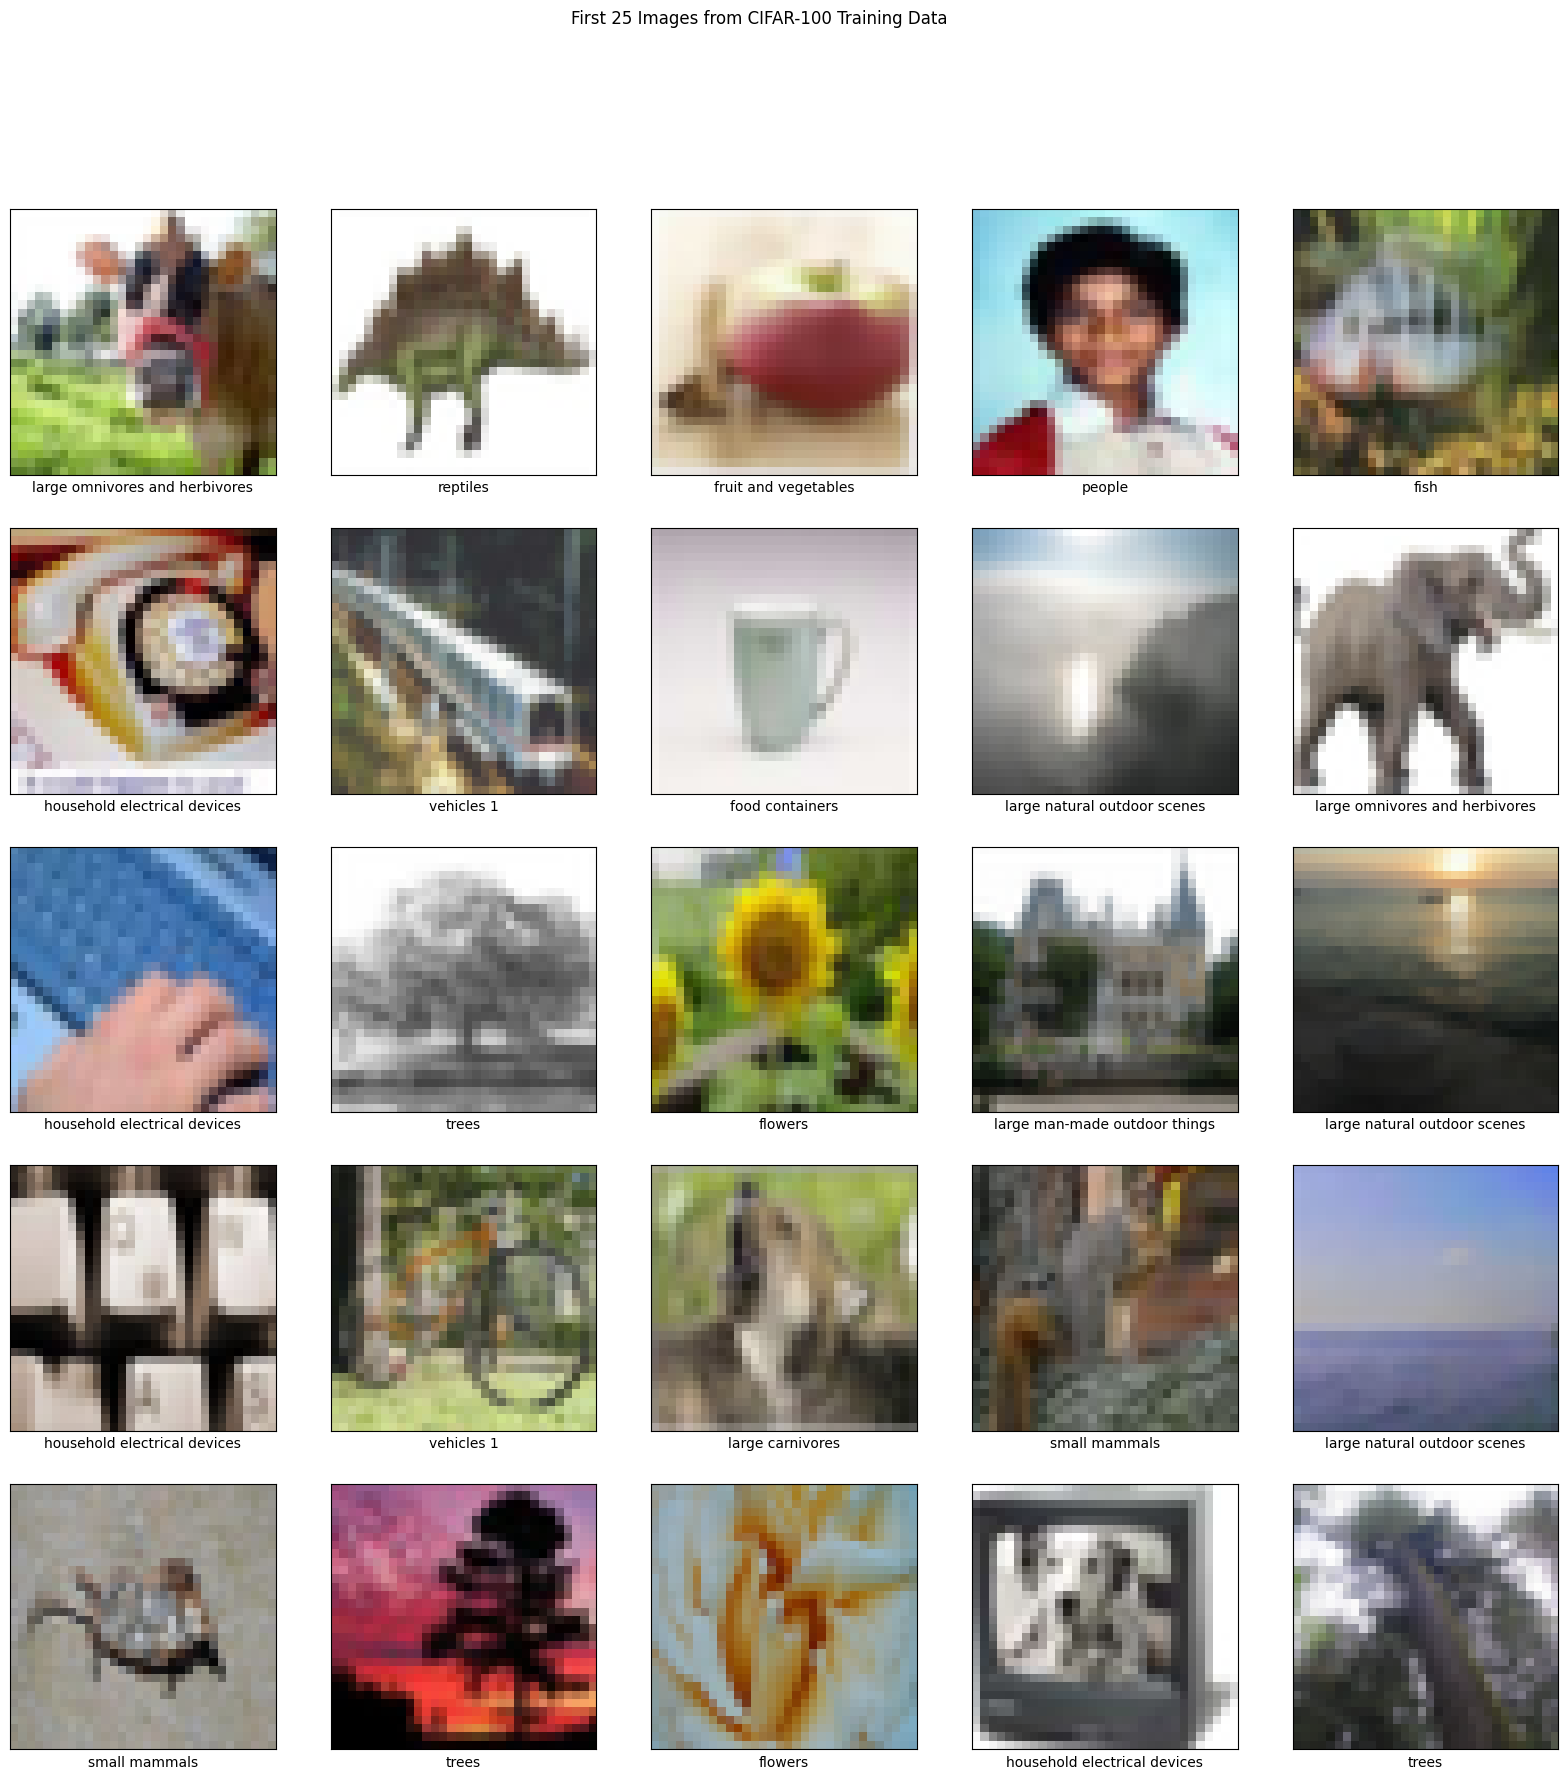

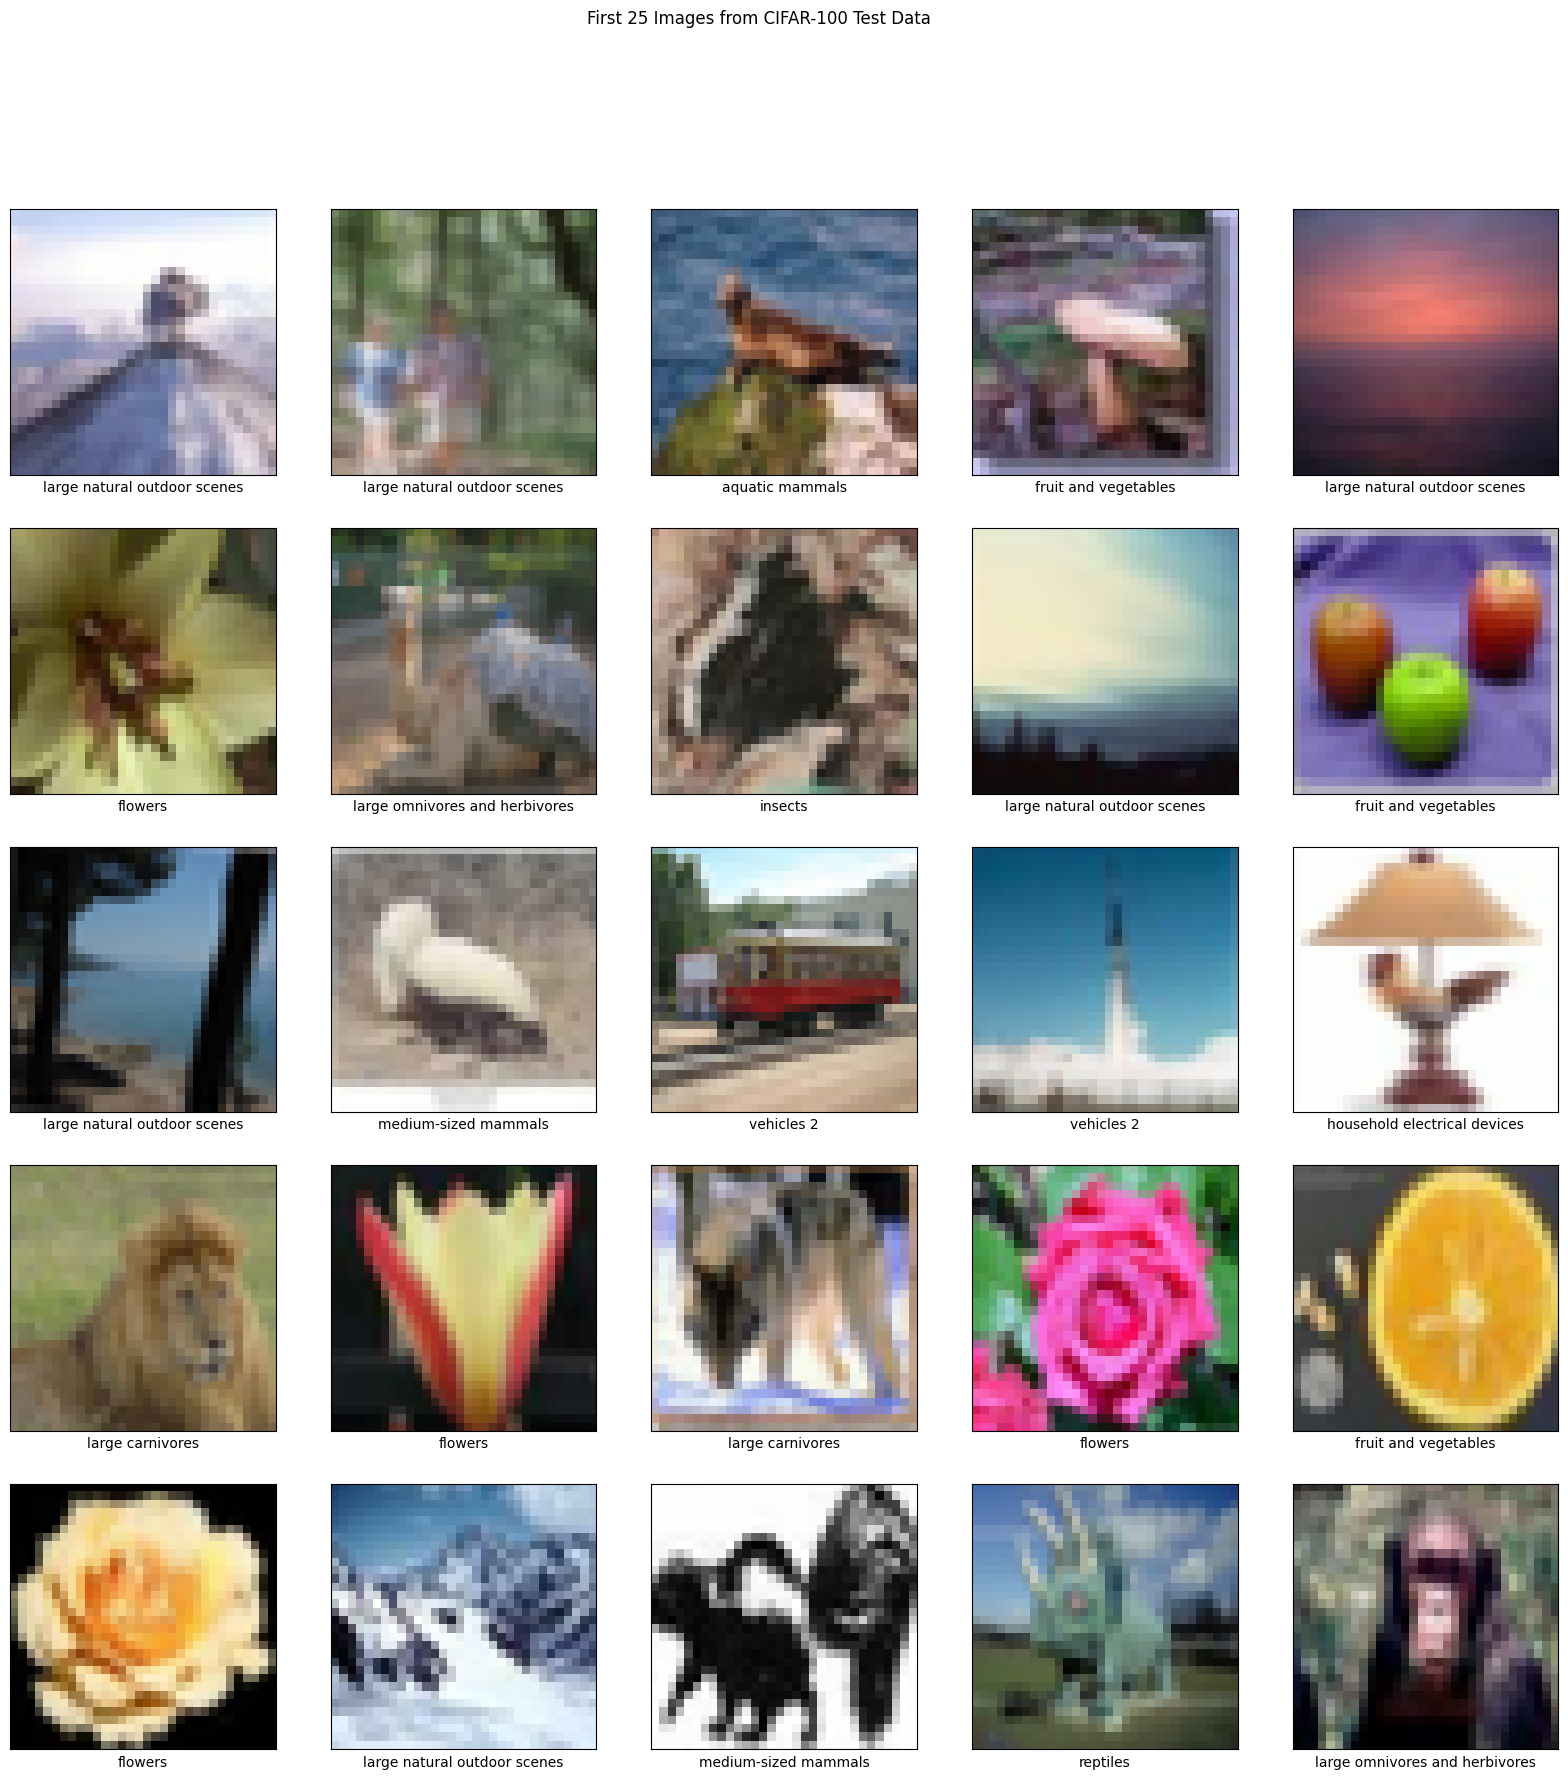

In [5]:
plot_images(x_train[:25], y_train[:25], "First 25 Images from CIFAR-100 Training Data")
plot_images(x_test[:25], y_test[:25], "First 25 Images from CIFAR-100 Test Data")

Import layers and models from tensorflow.keras and build a Sequential Model with Convulation layers at the base and Fully Connected Layers at the top.

We used the same model in the Example Notebook for MNIST and achieved only 41% accuracy on the test data.

We then used the following architecture to achieve 45% accuracy on the test data:

1. Conv Layer : 32 filters each of 3x3.
2. Conv Layer : 64 filters each of 3x3.
3. Max pool layer of 2x2 kernel size.
4. Conv Layer : 64 filters each of 2x2.
5. Conv Layer : 64 filters each of 2x2.
6. Max pool layer of 2x2 kernel size.
7. Flatten.
8. Dense of 80 neurons.
9. Dense of 50 neurons.
10. Dense of 20 neurons.

To train this, it required 40 minutes.

You should come up with your own architecture.

In [6]:
from keras import  layers, models

In [41]:
from tensorflow.keras import models,layers
model=models.Sequential([
    layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(2,2),activation='relu'),
    layers.Conv2D(64,(2,2),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(160,activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(80,activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(50,activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(20,activation='relu')

])
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_34 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 conv2d_35 (Conv2D)          (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_36 (Conv2D)          (None, 13, 13, 64)        16448     
                                                                 
 conv2d_37 (Conv2D)          (None, 12, 12, 64)        16448     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                 

In [42]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

model.fit(x_train, y_train, epochs=50,batch_size=64)

Epoch 1/50
782/782 [==============================] - 7s 7ms/step - loss: 2.9371 - accuracy: 0.0803
Epoch 2/50
782/782 [==============================] - 6s 7ms/step - loss: 2.7985 - accuracy: 0.1334
Epoch 3/50
782/782 [==============================] - 5s 7ms/step - loss: 2.6558 - accuracy: 0.1742
Epoch 4/50
782/782 [==============================] - 6s 7ms/step - loss: 2.5551 - accuracy: 0.2088
Epoch 5/50
782/782 [==============================] - 5s 7ms/step - loss: 2.4831 - accuracy: 0.2308
Epoch 6/50
782/782 [==============================] - 6s 7ms/step - loss: 2.4265 - accuracy: 0.2478
Epoch 7/50
782/782 [==============================] - 5s 7ms/step - loss: 2.3743 - accuracy: 0.2645
Epoch 8/50
782/782 [==============================] - 5s 7ms/step - loss: 2.3193 - accuracy: 0.2822
Epoch 9/50
782/782 [==============================] - 6s 7ms/step - loss: 2.2838 - accuracy: 0.2954
Epoch 10/50
782/782 [==============================] - 5s 7ms/step - loss: 2.2466 - accuracy: 0.3053

In [43]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {test_acc}')

313/313 [==============================] - 2s 5ms/step - loss: 1.9507 - accuracy: 0.4309
Test Accuracy: 0.4309000074863434


Plot the training accuracy vs number of epochs graph. Print the test accuracy.

Text(0, 0.5, 'ACCURACY')

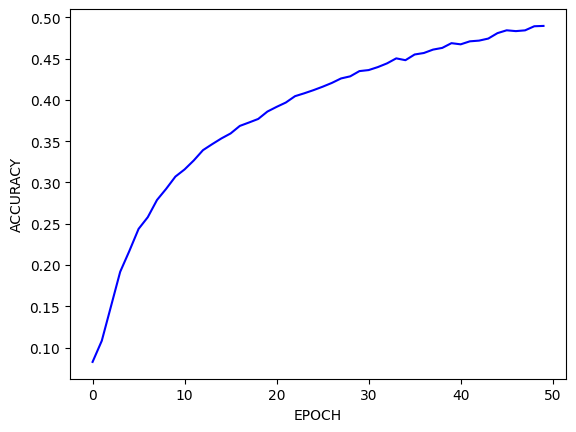

In [9]:
acc=model.history.history['accuracy']
epochs=range(len(acc))
plt.plot(epochs,acc,'b')
plt.xlabel('EPOCH')
plt.ylabel('ACCURACY')

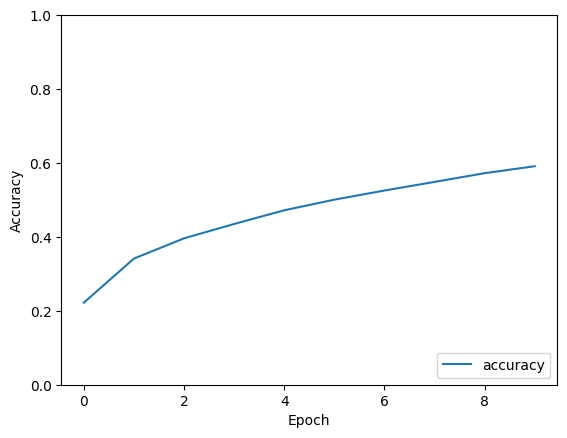

Check this website : https://paperswithcode.com/sota/image-classification-on-cifar-100 . It contains information about the best performing models. The top models are of transformers. We can check the ResNet-18 model. It consists of 18 layers. The architecture could be in the internet. Use ChatGPT if necessary. Training it for 10 epochs will take approximately 1 hour.

The layers are :

1. Conv layer : 64 kernels, 7x7 . strides = (2,2). activation =none.
2. Batch Normalization.
3. Relu Activation.
4. MaxPooling 3x3 . stride =2x2.
5. Conv layer : 64 kernels, 3x3 . strides = (1,1). activation =none.
6. Batch Normalization.
7. Relu Activation.
8. Same as 5 but 128 kernels.
9. Batch Normalization.
10. Relu Activation.
11. Same as 5 but 256 kernels.
12. Batch Normalization.
13. Relu Activation.
14. Same as 5 but 512 kernels.
15. Batch Normalization.
16. Relu Activation.
17. Global Average Pooling.
18. Dense layer of 20 neurons.





In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models

def build_resnet18(input_shape=(32, 32, 3), num_classes=100):
    inputs = tf.keras.Input(shape=input_shape)

    # Initial Convolutional Layer
    x = layers.Conv2D(64, (7, 7), strides=(2, 2), padding='same')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    x = layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

    # First Residual Block
    x = layers.Conv2D(64, (3, 3), strides=(1, 1), padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)

    # Second Residual Block
    x = layers.Conv2D(128, (3, 3), strides=(1, 1), padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)

    # Third Residual Block
    x = layers.Conv2D(256, (3, 3), strides=(1, 1), padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)

    # Fourth Residual Block
    x = layers.Conv2D(512, (3, 3), strides=(1, 1), padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)

    # Global Average Pooling and Dense Layer
    x = layers.GlobalAveragePooling2D()(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    model = models.Model(inputs, outputs)

    return model

# Build and compile the model
model = build_resnet18(input_shape=(32, 32, 3), num_classes=100)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 16, 16, 64)        9472      
                                                                 
 batch_normalization (Batch  (None, 16, 16, 64)        256       
 Normalization)                                                  
                                                                 
 re_lu (ReLU)                (None, 16, 16, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 8, 8, 64)          0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 64)          36928 

In [ ]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), batch_size=64)

Epoch 1/10
782/782 [==============================] - 16s 12ms/step - loss: 2.1921 - accuracy: 0.3205 - val_loss: 2.3830 - val_accuracy: 0.2854
Epoch 2/10
782/782 [==============================] - 8s 11ms/step - loss: 1.7725 - accuracy: 0.4446 - val_loss: 1.9899 - val_accuracy: 0.3940
Epoch 3/10
782/782 [==============================] - 8s 10ms/step - loss: 1.5711 - accuracy: 0.5008 - val_loss: 2.0652 - val_accuracy: 0.3803
Epoch 4/10
782/782 [==============================] - 8s 11ms/step - loss: 1.4273 - accuracy: 0.5449 - val_loss: 1.6798 - val_accuracy: 0.4816
Epoch 5/10
782/782 [==============================] - 8s 11ms/step - loss: 1.3114 - accuracy: 0.5820 - val_loss: 1.8605 - val_accuracy: 0.4539
Epoch 6/10
782/782 [==============================] - 8s 10ms/step - loss: 1.2080 - accuracy: 0.6135 - val_loss: 1.5644 - val_accuracy: 0.5247
Epoch 7/10
782/782 [==============================] - 9s 11ms/step - loss: 1.1123 - accuracy: 0.6434 - val_loss: 1.5434 - val_accuracy: 0.527

Question 2

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Load the data.

In [11]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year', 'Origin', 'Car Name']
dataset = pd.read_csv(url, names=column_names, na_values='?', comment='\t', sep=' ', skipinitialspace=True)
dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,Car Name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,NaN
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,NaN
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,NaN
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,NaN
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,NaN


Get an overview of the data.

In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    392 non-null    float64
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   Origin        398 non-null    int64  
 8   Car Name      0 non-null      float64
dtypes: float64(6), int64(3)
memory usage: 28.1 KB


Drop the null values and redundant columns. Or you may do imputation of null values, if you are familiar with that.

Search for dropping rows with null values in a Pandas dataframe.

In [13]:
dataset = dataset.drop('Car Name',axis=1)
dataset = dataset.dropna()
dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


##Handling Non-Numeric Data
The origin column contains "Label Encoded Values". More about it [here](https://www.geeksforgeeks.org/ml-label-encoding-of-datasets-in-python/).

We want to convert it into a [One-Hot-Encoded](https://www.geeksforgeeks.org/ml-one-hot-encoding-of-datasets-in-python//) value.

In [14]:
# Convert categorical 'Origin' column to one-hot encoded features : pd.get_dummies ...
dataset['Origin'] = dataset['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})
dataset = pd.get_dummies(dataset, columns=['Origin'], prefix='', prefix_sep='')

In [15]:
# Separate the target variable from the features in the dataset.
y = dataset['MPG']
X = dataset.drop('MPG', axis=1)

In [16]:
# Split the data into training and testing sets. Use sklearn.model_selection.train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Scaling the Data
It is evident that the features vary a lot by a quick statistical survey. To ensure that our model generalizes over a large variety of vehicles, we need to Normalize the data using the *scaler.fit_transform*.

In [17]:
# Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Building the Model

Build a Fully Connected Neural Network with 3-4 Dense layers. You may decide the number of neuron in each layers.

Fit the model on the train data and evaluate the predictions on test data.

Use Adam optimizer and MeanSquaredError cost function. The lower the error, the better the model. Try to get MSE < 6 on the test data.

In [18]:
model = tf.keras.models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])
model.compile(optimizer='adam', loss='mse', metrics=['mae', 'mse'])
history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)


Epoch 1/100
10/10 [==============================] - 3s 6ms/step - loss: 592.2298 - mae: 23.0942 - mse: 592.2298
Epoch 2/100
10/10 [==============================] - 0s 6ms/step - loss: 517.3890 - mae: 21.4614 - mse: 517.3890
Epoch 3/100
10/10 [==============================] - 0s 5ms/step - loss: 395.8727 - mae: 18.5900 - mse: 395.8727
Epoch 4/100
10/10 [==============================] - 0s 5ms/step - loss: 234.7130 - mae: 13.6451 - mse: 234.7130
Epoch 5/100
10/10 [==============================] - 0s 5ms/step - loss: 84.7590 - mae: 7.5635 - mse: 84.7590
Epoch 6/100
10/10 [==============================] - 0s 5ms/step - loss: 44.8777 - mae: 5.6318 - mse: 44.8777
Epoch 7/100
10/10 [==============================] - 0s 5ms/step - loss: 28.8632 - mae: 4.2825 - mse: 28.8632
Epoch 8/100
10/10 [==============================] - 0s 5ms/step - loss: 17.7959 - mae: 3.2483 - mse: 17.7959
Epoch 9/100
10/10 [==============================] - 0s 6ms/step - loss: 15.5029 - mae: 3.0470 - mse: 15.502

3/3 [==============================] - 0s 3ms/step
Test MSE: 5.882494371064539


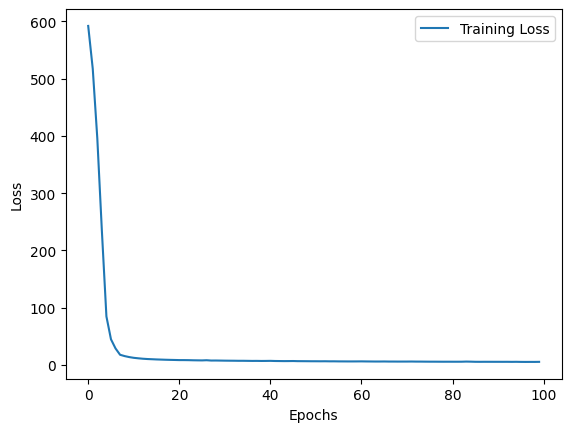

In [27]:
from sklearn.metrics import mean_squared_error
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Test MSE: {mse}')

# Plot the loss
plt.plot(history.history['loss'], label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

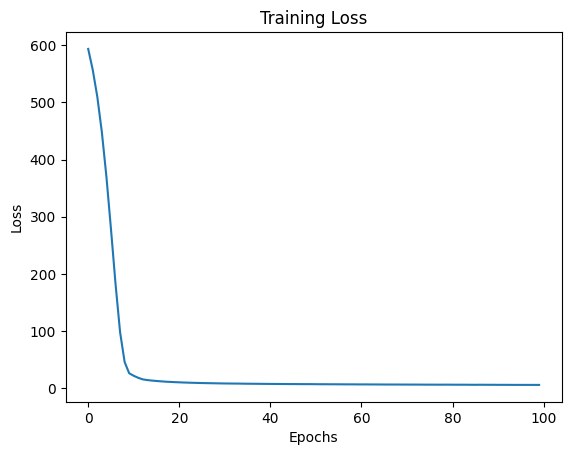

In [ ]:
#Plot the Loss from the history..

"..."

In [ ]:
# Evaluate the model on the test set